# plot_vorticity.ipynb

Author: Robert M. Frost

University of Oklahoma

Created: 08 February 2024

Purpose: Read in all cases to plot vorticity

In [9]:
import sys
sys.path.append("/home/rfrost/LES-utils/")

import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from LESutils import load_full
import seaborn
import cmocean
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap

### Settings

In [10]:
# directory to save figures
figdir = "/home/rfrost/manuscript_plots/"
# simulation to analyze
sims = ["full_step_6", "full_step_9", "full_step_12", "full_step_15"]

# z/zi to plot
height = 0.25

# start and end timesteps
t0 = 576000
t1 = 1152000
# start and end in hours
t0hr = t0 * 0.05 / 3600
t1hr = t1 * 0.05 / 3600
# spacing of output
dt = 1000

# lists to store stats, roll factor, and length scales
s_all, v_all = [], []
# loop over sims
for sim in sims:
    dnc = f"/home/rfrost/simulations/nc/{sim}/"
    # volumetric stats
    s = xr.open_dataset(f"{dnc}{t0}_{t1}_stats.nc")
    # convert time to hours
    s["time"] = s.time / 3600 + t0hr
    s_all.append(s)

    # vorticity
    v = xr.open_dataset(f"{dnc}{t0}_{t1}_vorticity.nc")
    # convert time to hours
    v["time"] = v.time / 3600 + t0hr
    v_all.append(v)

In [11]:
# plotting setup

# Set the font weight for plot titles
plt.rcParams['axes.titleweight'] = 'bold'

# Set the font weight for x-axis and y-axis labels
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

# Other plotting setup
rc('font', family='sans-serif')
rc('font', weight='normal', size=20)
rc('figure', facecolor='white')

# lists/cmaps for titles and stuff
ug_list = ["6", "9", "12", "15"]
time_colors = seaborn.color_palette("cubehelix", 7)
ug_colors = seaborn.color_palette("flare", 4)
linestyle = ["--","solid","solid","-.","-."]

In [12]:
# find average T_L at hr 9.8333
T_L = (843.69 + 861.95 + 841.57 + 844.23) / 4

tb = -2
tc = 4.5
td = 11
te = 17.5
tf = 24

tlmax = max((s_all[0].time-10)*3600/T_L)
tlmin = min((s_all[0].time-10)*3600/T_L)

# normalized times to be plot
jttl = [-2, 4.5, 11, 17.5, 24]
jtall = [abs(((s_all[0].time.values-10)*3600)/T_L - jttl[jt]).argmin() for jt in range(len(jttl))]

## Plotting

### End member cross sections

Text(0.5, 0, '$x$ [km]')

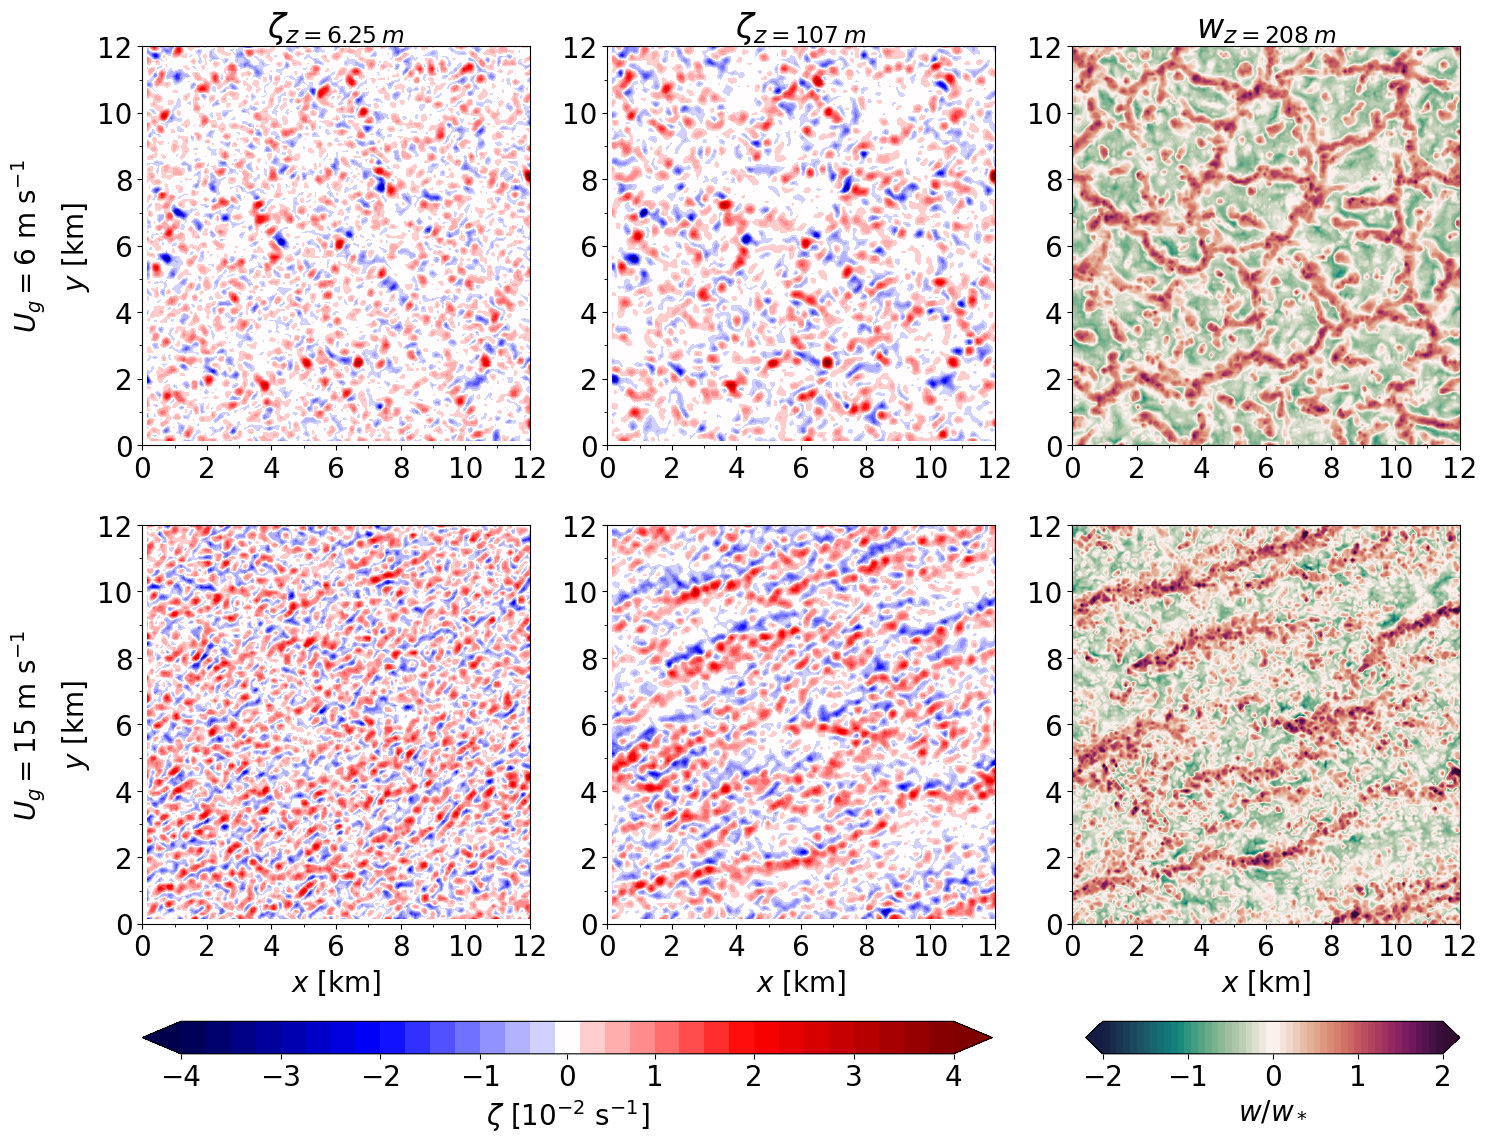

In [13]:
fig = plt.figure(figsize=(17,13))

gs1 = GridSpec(2,3, top=0.95, bottom=0.275)
ax1 = fig.add_subplot(gs1[0,0])
ax2 = fig.add_subplot(gs1[1,0])
ax3 = fig.add_subplot(gs1[0,1])
ax4 = fig.add_subplot(gs1[1,1])
ax5 = fig.add_subplot(gs1[0,2])
ax6 = fig.add_subplot(gs1[1,2])
gs2 = GridSpec(1,1, top=0.20, bottom=0.175, left=0.125, right=0.625)
ax7 = fig.add_subplot(gs2[:])
gs3 = GridSpec(1,1, top=0.20, bottom=0.175, left=0.68, right=0.9)
ax8 = fig.add_subplot(gs3[:])

x, y = s_all[0].x/1000, s_all[0].y/1000

clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]
clevw = np.linspace(-2,2,51)
cmapw = cmocean.cm.curl
cmap = mpl.cm.seismic

cf = ax1.contourf(x, y, v_all[0].zeta3[359,:,:,0].rolling(x=3,y=3).mean().T * 10 ** 2, clevs, cmap=cmap, extend="both")
ax1.text(-3.5, 6, "$U_g = 6$ m s$^{-1}$", rotation=90, va="center", ha="center")
ax1.set_title("$\zeta_{z = 6.25 \> m}$")

ax2.contourf(x, y, v_all[3].zeta3[132,:,:,0].rolling(x=3,y=3).mean().T * 10 ** 2, clevs, cmap=cmap, extend="both")
ax2.text(-3.5, 6, "$U_g = 15$ m s$^{-1}$", rotation=90, va="center", ha="center")

ax3.contourf(x, y, v_all[0].zeta3[359,:,:,8].rolling(x=3,y=3).mean().T * 10 ** 2, clevs, cmap=cmap, extend="both")
ax3.set_title("$\zeta_{z = 107 \> m}$")
ax4.contourf(x, y, s_all[3].zeta[132,:,:,8].rolling(x=3,y=3).mean().T * 10 ** 2, clevs, cmap=cmap, extend="both")

cfw = ax5.contourf(x, y, s_all[0].w[359,:,:,16].T / s_all[0].wstar[359], clevw, cmap=cmapw, extend="both")
ax5.set_title("$w_{z = 208 \> m}$")
ax6.contourf(x, y, s_all[3].w[132,:,:,16].T / s_all[3].wstar[132], clevw, cmap=cmapw, extend="both")

cbar = plt.colorbar(cf, ax7, orientation="horizontal")
cbar.set_label("$\zeta$ [$10^{-2}$ s$^{-1}$]")
cbar.set_ticks(np.arange(-4, 4.1, 1))

cbar = plt.colorbar(cfw, ax8, orientation="horizontal")
cbar.set_label("$w / w_*$")
cbar.set_ticks(np.arange(-2,2.1,1))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax in axes:
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    # ax.set_xlim(4,8)
    # ax.set_ylim(4,8)

ax1.set_ylabel("$y$ [km]")
ax2.set_ylabel("$y$ [km]")
ax2.set_xlabel("$x$ [km]")
ax4.set_xlabel("$x$ [km]")
ax6.set_xlabel("$x$ [km]")

### $\zeta z_i / w_*$

In [14]:
# fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24,20), sharex=True, sharey=True)

# # contourf plots
# clevs = np.arange(-25,25.1, 0.5)

# # 6 m/s
# sim = 0
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["b", "c", "d", "e", "f"]
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j][:,:,8].T * (zi_values[j] / wstar_values[j]),
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     iax.set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", 
#                   loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 9 m/s
# sim = 1
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j][:,:,8].T * (zi_values[j] / wstar_values[j]),
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 12 m/s
# sim = 2
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j][:,:,8].T * (zi_values[j] / wstar_values[j]),
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 15 m/s
# sim = 3
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j][:,:,8].T * (zi_values[j] / wstar_values[j]),
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # Create a new axis for the colorbar
# cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])  # Adjust the position and size as needed
# # Add the colorbar
# cbar = plt.colorbar(cf, cax=cbar_ax, orientation='horizontal')
# cbar.set_label("$\zeta z_i / w_*$")  # Customize the colorbar label
# cbar.set_ticks(np.arange(-25,25.1,5))

# # sim labels
# case = ["6", "9", "12", "15"]
# for i, iax in enumerate(ax[:,0]):
#     iax.text(-4.25, 6, f"U{case[i]}", 
#             rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
#     iax.set_ylabel("$y$ [km]")
    
# # axis labels
# for i, iax in enumerate(ax[3,:]):
#     iax.set_xlabel("$x$ [km]")

# plt.subplots_adjust(hspace=0.10, wspace=0.1)

### $\zeta$

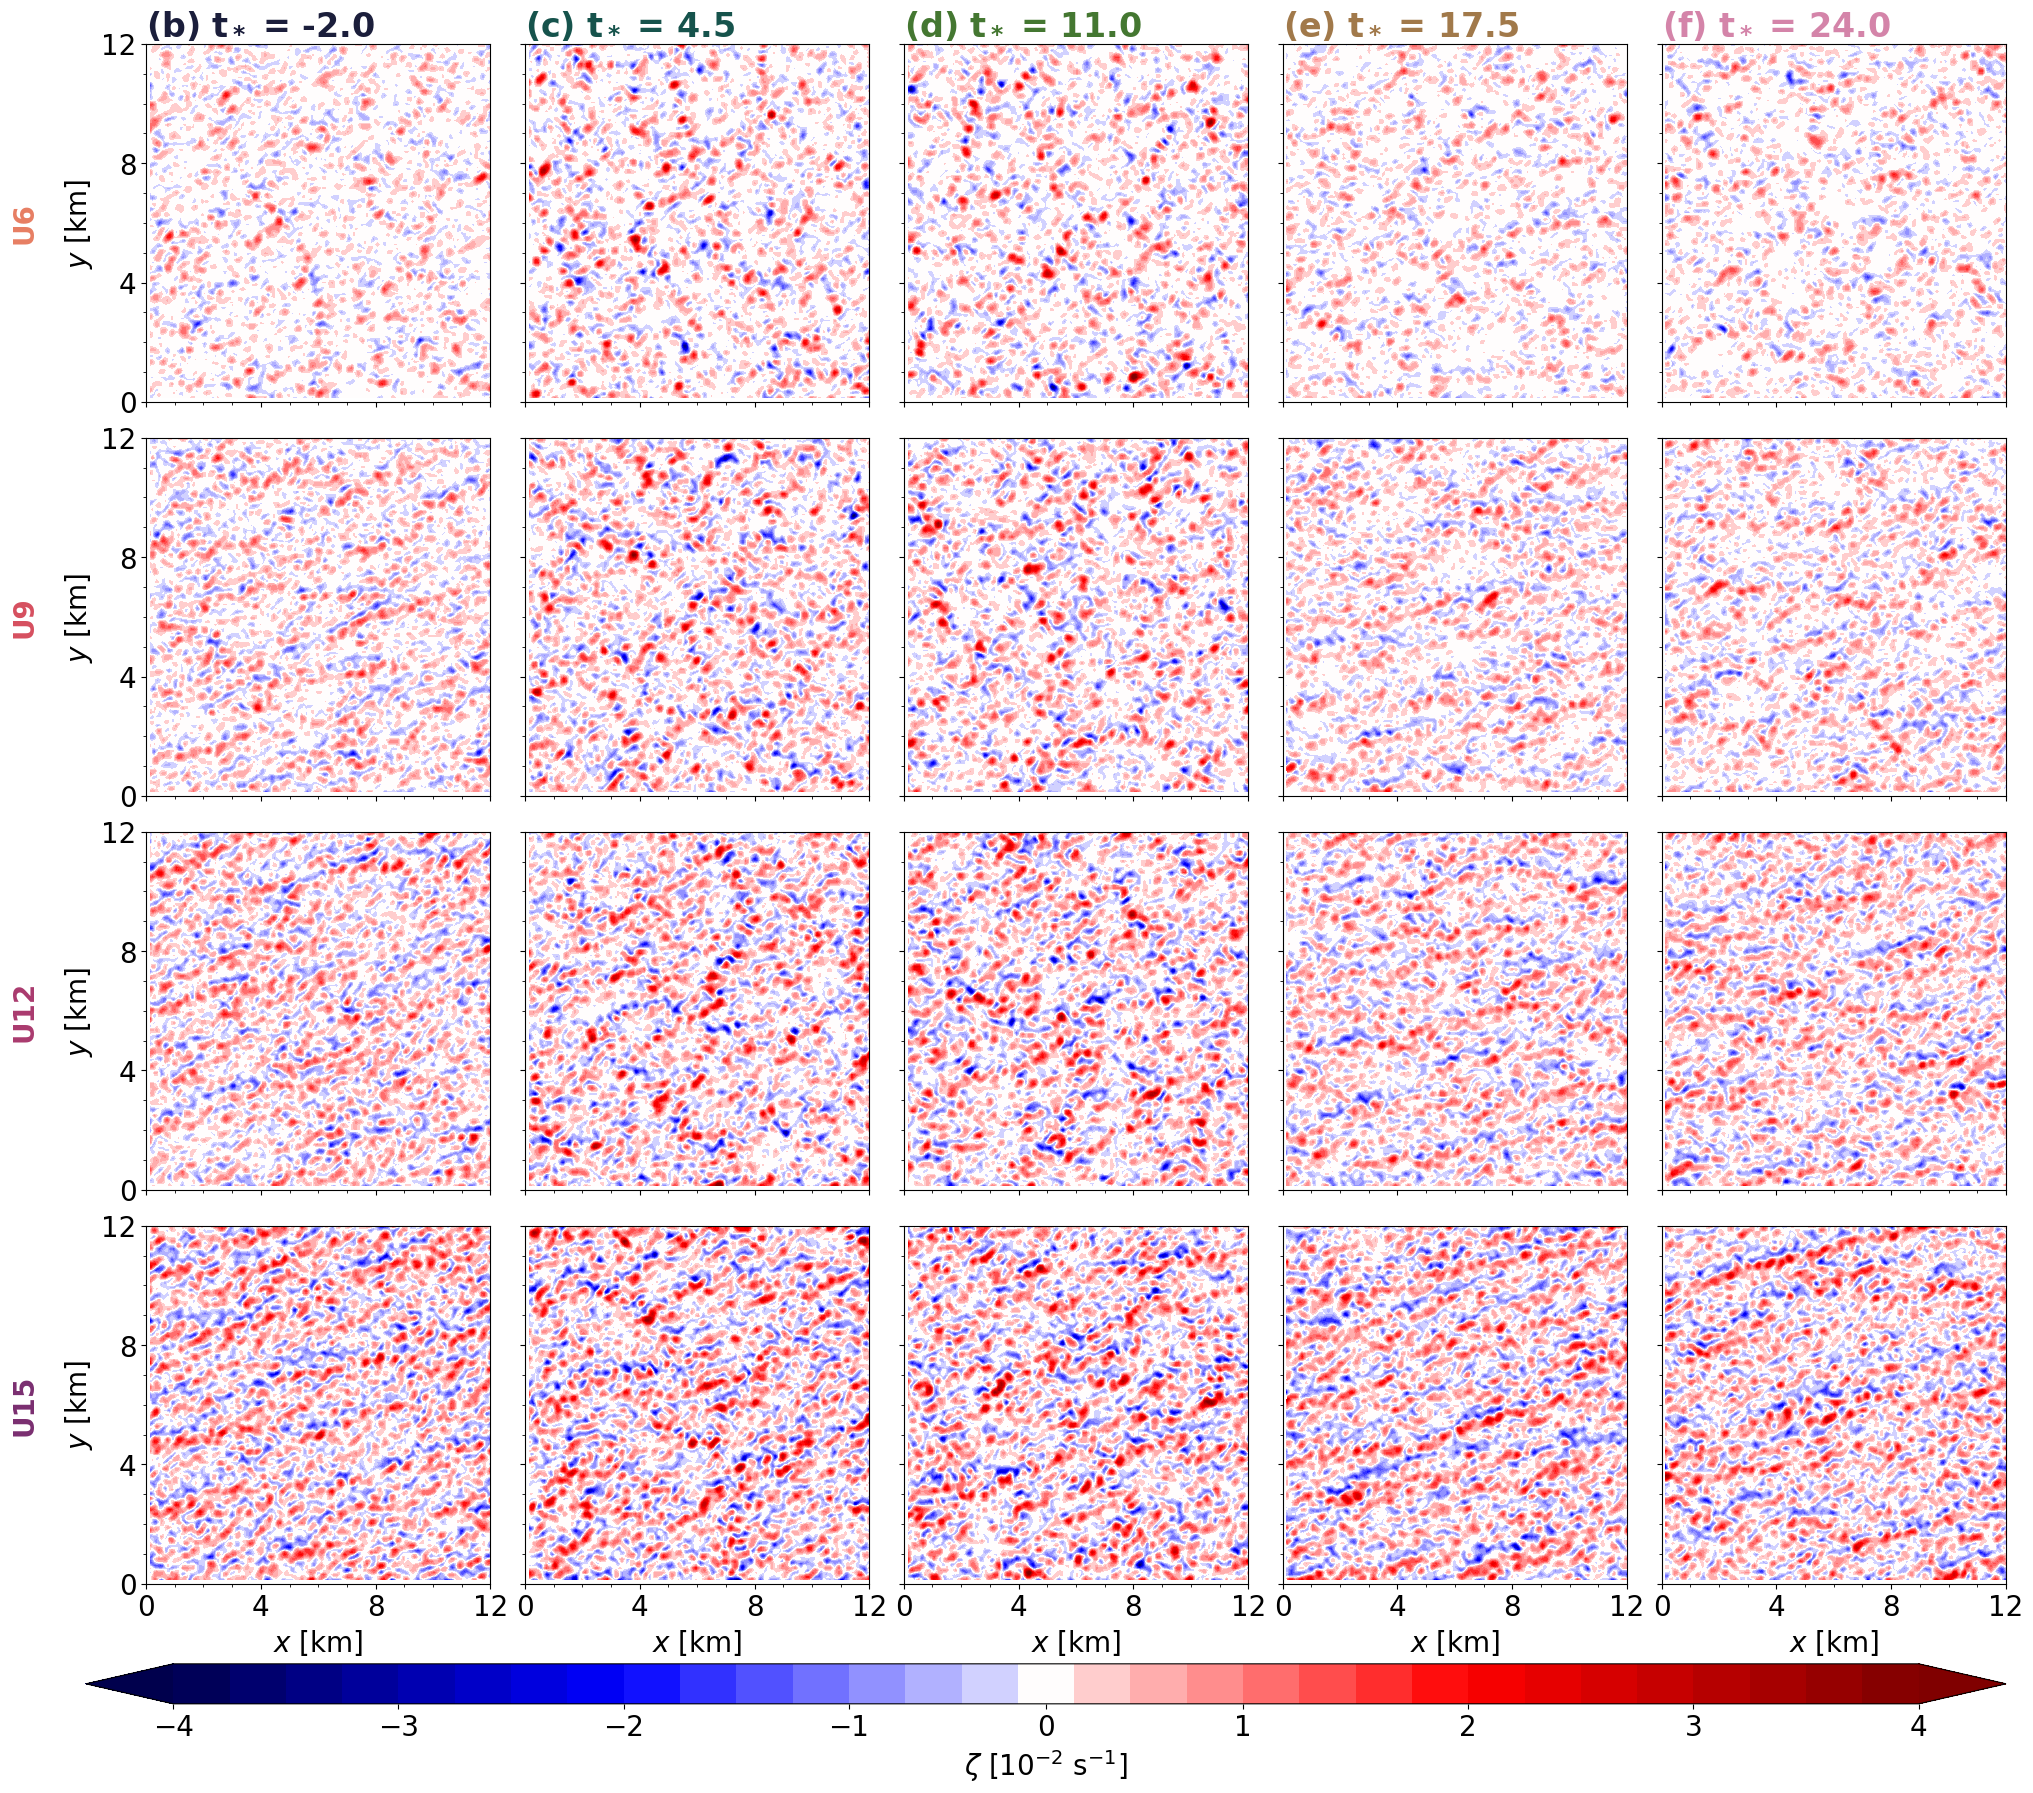

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24,20), sharex=True, sharey=True)

# contourf plots
clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]

# 6 m/s
sim = 0
time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [v_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
lab = ["b", "c", "d", "e", "f"]
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    iax.set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", 
                  loc="left", c=time_colors[j])
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 9 m/s
sim = 1
time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [v_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 12 m/s
sim = 2
time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [v_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 15 m/s
sim = 3
time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [v_all[sim].zeta3[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T* 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])  # Adjust the position and size as needed
# Add the colorbar
cbar = plt.colorbar(cf, cax=cbar_ax, orientation='horizontal')
cbar.set_label("$\zeta$ [$10^{-2}$ s$^{-1}$]")  # Customize the colorbar label
cbar.set_ticks(np.arange(-4,4.1,1))

# sim labels
case = ["6", "9", "12", "15"]
for i, iax in enumerate(ax[:,0]):
    iax.text(-4.25, 6, f"U{case[i]}", 
            rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
    iax.set_ylabel("$y$ [km]")
    
# axis labels
for i, iax in enumerate(ax[3,:]):
    iax.set_xlabel("$x$ [km]")

plt.subplots_adjust(hspace=0.10, wspace=0.1)

### 0-100m $\zeta$

In [16]:
# for i, v in enumerate(v_all):
#     # v["zeta3_100"] = v.zeta3.where(v.z < 110, drop=True)
#     v["zeta3_100_int"] = v.zeta3[:,:,:,:8].integrate(coord="z")

In [17]:
# fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24,20), sharex=True, sharey=True)

# # contourf plots
# clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
#        -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
#         0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
#         2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]

# # 6 m/s
# sim = 0
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3_100_int[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["b", "c", "d", "e", "f"]
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j].T,
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     iax.set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", 
#                   loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 9 m/s
# sim = 1
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3_100_int[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j].T,
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 12 m/s
# sim = 2
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3_100_int[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j].T,
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 15 m/s
# sim = 3
# time_values = [v_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# zeta3_values = [v_all[sim].zeta3_100_int[jtall[i]].rolling(x=3,y=3).mean() for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# for j, iax in enumerate(ax[sim,:]):
#     cf = iax.contourf(x_values/1000, y_values/1000, 
#                       zeta3_values[j].T,
#                       cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     iax.xaxis.set_major_locator(MultipleLocator(4))
#     iax.xaxis.set_minor_locator(MultipleLocator(1))
#     iax.yaxis.set_major_locator(MultipleLocator(4))
#     iax.yaxis.set_minor_locator(MultipleLocator(1))
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # Create a new axis for the colorbar
# cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])  # Adjust the position and size as needed
# # Add the colorbar
# cbar = plt.colorbar(cf, cax=cbar_ax, orientation='horizontal')
# cbar.set_label("0-100 m $\zeta$ [s$^{-1}$]")  # Customize the colorbar label
# cbar.set_ticks(np.arange(-4,4.1,1))

# # sim labels
# case = ["6", "9", "12", "15"]
# for i, iax in enumerate(ax[:,0]):
#     iax.text(-4.25, 6, f"U{case[i]}", 
#             rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
#     iax.set_ylabel("$y$ [km]")
    
# # axis labels
# for i, iax in enumerate(ax[3,:]):
#     iax.set_xlabel("$x$ [km]")

# plt.subplots_adjust(hspace=0.10, wspace=0.1)

## Time series

In [18]:
for i, v in enumerate(v_all):
    v["abs_omega_mean"] = v.zeta1_abs_mean + v.zeta2_abs_mean + v.zeta3_abs_mean
    v["abs_horiz_omega_mean"] = v.zeta1_abs_mean + v.zeta2_abs_mean

### 50 m $\langle \zeta^+ \rangle$, $\langle |\omega_h| \rangle$, $\langle |\omega| \rangle$, $\langle \zeta^+ \rangle / \langle |\omega| \rangle$

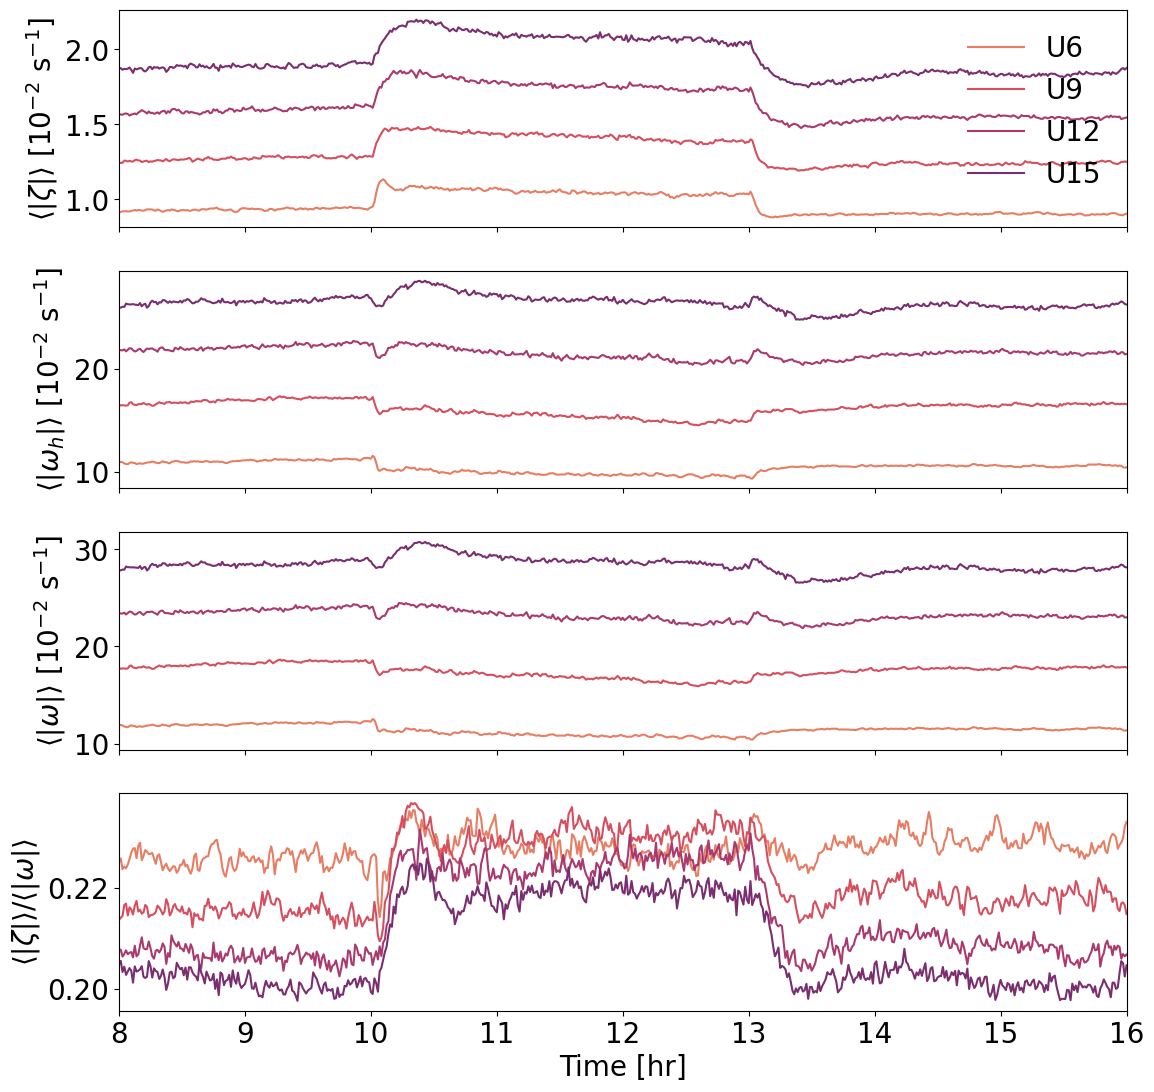

In [19]:
lab = ["U6", "U9", "U12", "U15"]

hidx = 0

fig, ax = plt.subplots(nrows=4, figsize=(13,13), sharex=True)

for i, v in enumerate(v_all):
    ax[0].plot(v.time, v.zeta3_abs_mean[:,hidx] * 10 ** 2, 
            label=lab[i], c=ug_colors[i])
    ax[1].plot(v.time, v.abs_horiz_omega_mean[:,hidx] * 10 ** 2, c=ug_colors[i])
    ax[2].plot(v.time, v.abs_omega_mean[:,hidx] * 10 ** 2, c=ug_colors[i])
    ax[3].plot(v.time, v.zeta3_abs_mean[:,hidx] / v.abs_omega_mean[:,4], c=ug_colors[i])

ax[0].set_ylabel("$\\langle |\zeta| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[1].set_ylabel("$\\langle |\omega_h| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[2].set_ylabel("$\\langle |\omega| \\rangle$ [10$^{-2}$ s$^{-1}$]")
ax[3].set_ylabel("$\\langle |\zeta| \\rangle / \\langle |\omega| \\rangle$")
ax[3].set_xlabel("Time [hr]")

# ax[0].set_ylim(0.5,2)
# ax[1].set_ylim(3,9)
# ax[2].set_ylim(3,11)
# ax[3].set_ylim(0.14,0.18)
ax[3].set_xlim(8,16)

# ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
# ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))
# ax[1].yaxis.set_major_locator(MultipleLocator(2))
# ax[1].yaxis.set_minor_locator(MultipleLocator(1))
# ax[2].yaxis.set_major_locator(MultipleLocator(2))
# ax[2].yaxis.set_minor_locator(MultipleLocator(1))
# ax[3].yaxis.set_major_locator(MultipleLocator(0.02))
# ax[3].xaxis.set_major_locator(MultipleLocator(2))
# ax[3].xaxis.set_minor_locator(MultipleLocator(1))

ax[0].legend(frameon=False)#, ncols=4, loc="upper center")

### $\zeta^+$ vs. $-z_i / L$

In [20]:
for i, s in enumerate(s_all):
    s["zi_L_rolling"] = s.zi_L.rolling(time=6).mean(0)

for i, v in enumerate(v_all):
    v["zeta3_pos_mean_rolling"] = v.zeta3_pos_mean.rolling(time=6).mean()

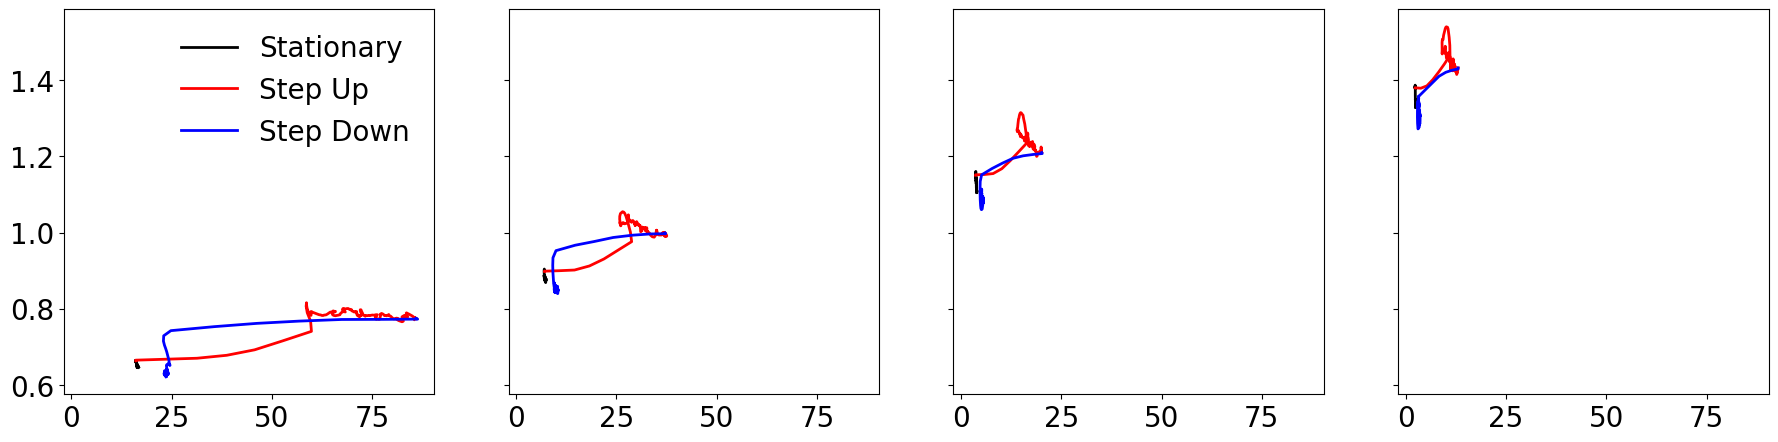

In [21]:
colors2 = ["black", "red", "blue"]

fig, ax = plt.subplots(figsize=(22,5), ncols=4, sharex=True, sharey=True)

sim = 0
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             v_all[sim].zeta3_pos_mean_rolling[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             v_all[sim].zeta3_pos_mean_rolling[143:360,4] * 10 ** 2, 
             label="Step Up", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             v_all[sim].zeta3_pos_mean_rolling[359:,4] * 10 ** 2, 
             label="Step Down", c=colors2[2], lw=2)

sim = 1
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             v_all[sim].zeta3_pos_mean_rolling[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             v_all[sim].zeta3_pos_mean_rolling[143:360,4] * 10 ** 2, 
             label="Step Up", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             v_all[sim].zeta3_pos_mean_rolling[359:,4] * 10 ** 2, 
             label="Step Down", c=colors2[2], lw=2)

sim = 2
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             v_all[sim].zeta3_pos_mean_rolling[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             v_all[sim].zeta3_pos_mean_rolling[143:360,4] * 10 ** 2, 
             label="Step Up", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             v_all[sim].zeta3_pos_mean_rolling[359:,4] * 10 ** 2, 
             label="Step Down", c=colors2[2], lw=2)

sim = 3
ax[sim].plot(s_all[sim].zi_L_rolling[:144], 
             v_all[sim].zeta3_pos_mean_rolling[:144,4] * 10 ** 2, 
             label="Stationary", c=colors2[0], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[143:360], 
             v_all[sim].zeta3_pos_mean_rolling[143:360,4] * 10 ** 2, 
             label="Step Up", c=colors2[1], lw=2)
ax[sim].plot(s_all[sim].zi_L_rolling[359:], 
             v_all[sim].zeta3_pos_mean_rolling[359:,4] * 10 ** 2, 
             label="Step Down", c=colors2[2], lw=2)

ax[0].legend(frameon=False)

Text(0, 0.5, '$\\langle \\zeta^+_{50 m} \\rangle$ [10$^{-2}$ s$^{-1}$]')

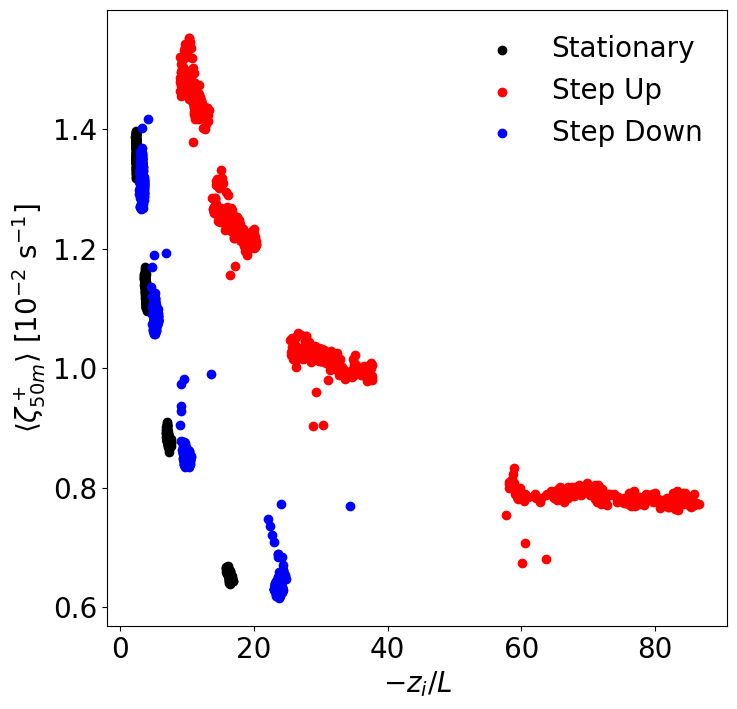

In [22]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(4):
    ax.scatter(s_all[i].zi_L[:144], v_all[i].zeta3_pos_mean[:144,4] * 10 ** 2,
               c=colors2[0])
    ax.scatter(s_all[i].zi_L[145:360], v_all[i].zeta3_pos_mean[145:360,4] * 10 ** 2,
               c=colors2[1])
    ax.scatter(s_all[i].zi_L[361:], v_all[i].zeta3_pos_mean[361:,4] * 10 ** 2,
               c=colors2[2])
    
ax.legend(["Stationary", "Step Up", "Step Down"], frameon=False)

ax.set_xlabel("$-z_i / L$")
ax.set_ylabel("$\\langle \zeta^+_{50 m} \\rangle$ [10$^{-2}$ s$^{-1}$]")

### $|\zeta| z_i / w_*$

## Test simulation comparison

In [23]:
error

NameError: name 'error' is not defined

In [24]:
v = xr.open_dataset("/home/rfrost/simulations/nc/zeta_test/288000_576000_vorticity.nc")
s = xr.open_dataset("/home/rfrost/simulations/nc/zeta_test/288000_576000_stats.nc")

In [25]:
v["x"] = np.linspace(0,2000,160)
v["y"] = np.linspace(0,2000,160)

Text(0.5, 1.0, 'U15 2 km $\\times$ 2km $\\times$ 2 km')

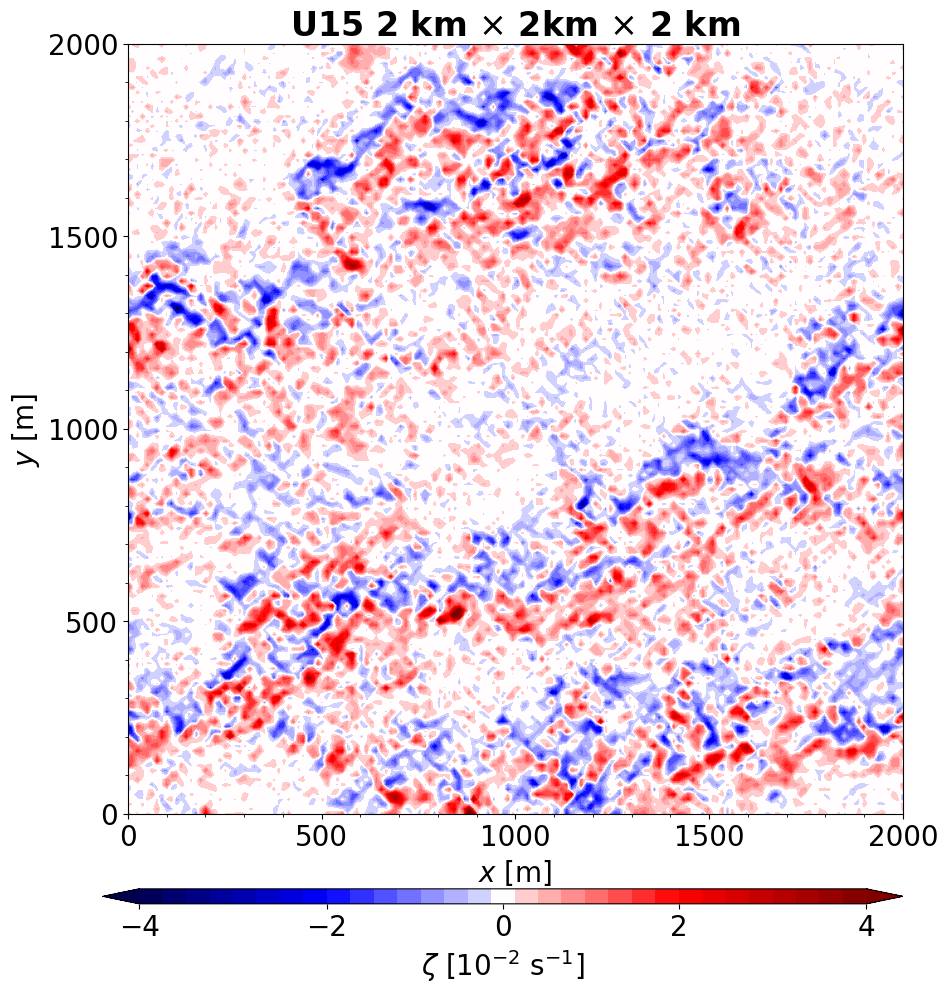

In [26]:
x, y, z = v.x, v.y, v.z

clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]

fig, ax = plt.subplots(figsize=(10,10))

cf = ax.contourf(x, y, v.zeta3[288,:,:,8].T * 10 ** 2, 
            clevs, cmap=mpl.cm.seismic, extend="both")

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.1, 0.02, 0.8, 0.015])  # Adjust the position and size as needed
# Add the colorbar
cbar = plt.colorbar(cf, cax=cbar_ax, orientation='horizontal')
cbar.set_label("$\zeta$ [$10^{-2}$ s$^{-1}$]")  # Customize the colorbar label
cbar.set_ticks(np.arange(-4,4.1,2))

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(100))

ax.set_xlabel("$x$ [m]")
ax.set_ylabel("$y$ [m]")

ax.set_title("U15 2 km $\\times$ 2km $\\times$ 2 km")

(5.0, 7.0)

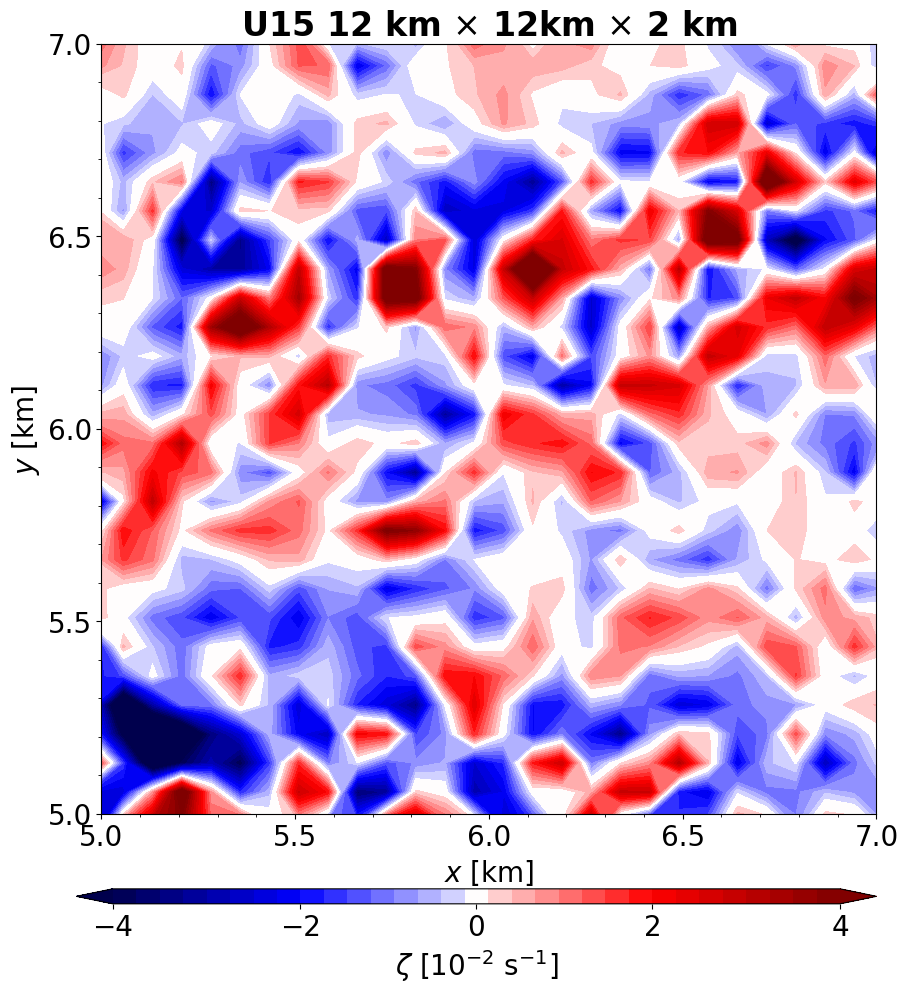

In [27]:
x, y, z = v.x, v.y, v.z

clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]

fig, ax = plt.subplots(figsize=(10,10))

cf = ax.contourf(v_all[3].x/1000, v_all[3].y/1000, v_all[3].zeta3[288,:,:,8].T * 10 ** 2, 
            clevs, cmap=mpl.cm.seismic, extend="both")

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.1, 0.02, 0.8, 0.015])  # Adjust the position and size as needed
# Add the colorbar
cbar = plt.colorbar(cf, cax=cbar_ax, orientation='horizontal')
cbar.set_label("$\zeta$ [$10^{-2}$ s$^{-1}$]")  # Customize the colorbar label
cbar.set_ticks(np.arange(-4,4.1,2))

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_xlabel("$x$ [km]")
ax.set_ylabel("$y$ [km]")

ax.set_title("U15 12 km $\\times$ 12km $\\times$ 2 km")

ax.set_xlim(5,7)
ax.set_ylim(5,7)